In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
print(df.shape)
print(df.info())

(14640, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  ob

In [5]:
df.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

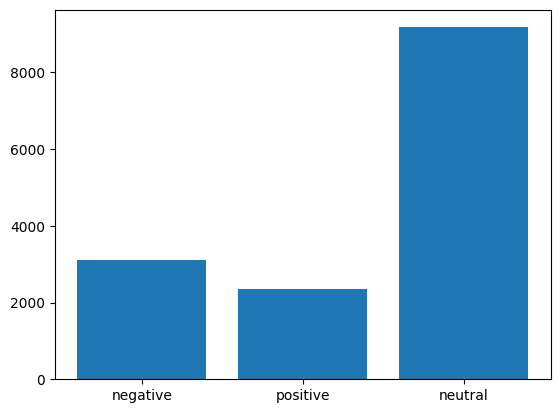

In [6]:
classes = df.airline_sentiment.unique()
counts = []
for i in classes:
    count = len(df[df.airline_sentiment == i])
    counts.append(count)
plt.bar(['negative','positive', 'neutral'], counts)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


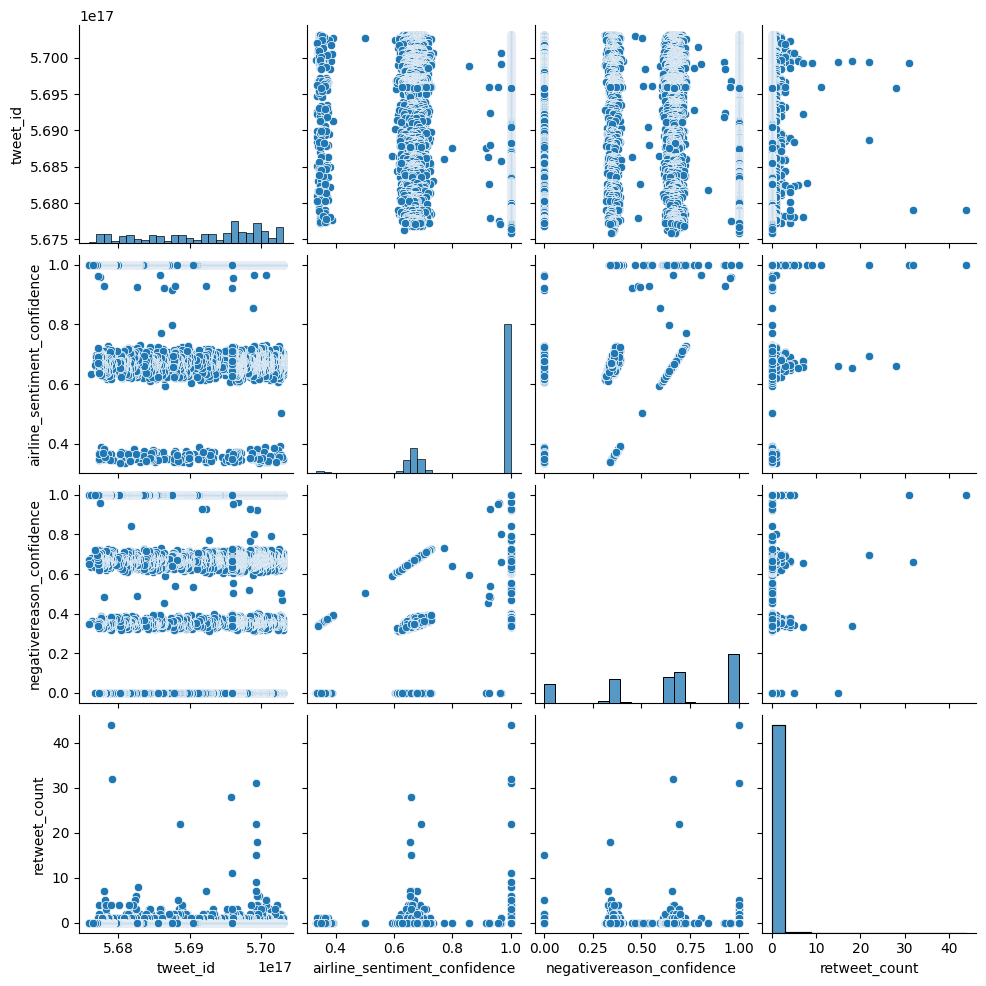

In [7]:
sb.pairplot(df)

In [8]:
x = df.text.values
y = df.airline_sentiment.values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 32)

In [9]:
vectorizer = CountVectorizer()

In [10]:
vectorizer.fit(x_train)

CountVectorizer()

In [11]:
X_train = vectorizer.transform(x_train)

In [12]:
X_test = vectorizer.transform(x_test)

In [13]:
print("First Tweet : \n")
print("Before Vectorizing :", x_test[0], "\n after vectorizing :", X_test[0])

First Tweet : 

Before Vectorizing : @JetBlue nope. This 8:45am flight is now not leaving until almost 5pm. 5! I can't believe I paid money for this. 
 after vectorizing :   (0, 915)	1
  (0, 1114)	1
  (0, 1862)	1
  (0, 2518)	1
  (0, 3019)	1
  (0, 5273)	1
  (0, 5402)	1
  (0, 6726)	1
  (0, 6852)	1
  (0, 7238)	1
  (0, 7994)	1
  (0, 8383)	1
  (0, 8402)	1
  (0, 8442)	1
  (0, 8805)	1
  (0, 11580)	2
  (0, 12270)	1


In [14]:
import re

In [15]:
d = ",.!?/&-:;@'..."
"["+"\\".join(d)+"]"




"[,\\.\\!\\?\\/\\&\\-\\:\\;\\@\\'\\.\\.\\.]"

In [16]:
#Clean the string
s = x_train[0]

In [17]:
s = ' '.join(w for w in re.split("["+"\\".join(d)+"]", str(s)) if w)

In [18]:
classifier = LogisticRegression(max_iter=1000)

In [19]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [20]:
score = classifier.score(X_test,y_test)

In [21]:
print("Accuracy", score)

Accuracy 0.7988387978142076


In [22]:
y_pred = classifier.predict(X_test)

In [23]:
cm = confusion_matrix(y_test, y_pred, labels = df.airline_sentiment.unique())

In [24]:
df_cm = pd.DataFrame(cm, index = df.airline_sentiment.unique(), columns = df.airline_sentiment.unique())

In [25]:
df_cm

,neutral,positive,negative
neutral,348,70,182
positive,67,306,87
negative,133,50,1685


In [26]:
df_cm_percentage = df_cm.copy()
for i in df_cm_percentage:
    df_cm_percentage[i]/=df_cm_percentage[i].sum()
df_cm_percentage

,neutral,positive,negative
neutral,0.635036,0.164319,0.093142
positive,0.122263,0.718310,0.044524
negative,0.242701,0.117371,0.862334


In [30]:
comment = "I am a good boy"
vectComment = vectorizer.transform(np.array([comment]))

prediction = classifier.predict(vectComment)

if(prediction[0] == 'positive'):
    print("Comment is", 'positive')
elif(prediction[0] == 'negative'):
    print("Comment is", 'negative')
else:
    print("Comment is", 'neutral')
# prediction[0]
# print("Tweet is", 'positive' if prediction[0]=='positive' else if prediction[0]=='positive' 'negative')

Comment is neutral
